In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# # Load the dataset
file_path = '/Users/jameswang/workspace/genre recognition project/features.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop 'filename' column
data = data.drop(columns=['filename'])

# Encode 'subfolder' column if it's the target variable
if data['subfolder'].dtype == 'object':
    le = LabelEncoder()
    data['subfolder'] = le.fit_transform(data['subfolder'])

# Split the dataset into features (X) and target (y)
X = data.drop('subfolder', axis=1)
y = data['subfolder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# feature_importance_df

selected_features = feature_importance_df.head(10)['Feature']



In [3]:
selected_features = feature_importance_df.head(20)['Feature']

selected_features

6018    pcm_fftMag_spectralRollOff90.0_sma_de_peakRang...
3719             voicingFinalUnclipped_sma_percentile99.0
5496         audspec_lengthL1norm_sma_de_peakMeanMeanDist
6027    pcm_fftMag_spectralRollOff90.0_sma_de_stddevFa...
1250           pcm_fftMag_spectralFlux_sma_percentile99.0
6081    pcm_fftMag_spectralVariance_sma_de_peakMeanMea...
5053               pcm_fftMag_spectralSkewness_sma_rqmean
4966              pcm_fftMag_spectralFlux_sma_peakMeanAbs
3258                             mfcc_sma_de[2]_quartile1
5196                              mfcc_sma[2]_peakMeanAbs
6147    pcm_fftMag_psySharpness_sma_de_stddevFallingSlope
6011    pcm_fftMag_spectralRollOff75.0_sma_de_meanFall...
1343       pcm_fftMag_spectralVariance_sma_percentile99.0
3106            pcm_fftMag_spectralKurtosis_sma_de_iqr1-2
567                   audSpec_Rfilt_sma[10]_percentile1.0
6219                       mfcc_sma_de[4]_meanRisingSlope
3136            pcm_fftMag_spectralSlope_sma_de_quartile3
3292          

In [4]:
num_features_to_test = [10, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6373]  # You can modify this list based on your needs

# Initialize classifiers
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
stacking_model = StackingClassifier(
    estimators=[('Logistic Regression', svm_model), ('Random Forest', rf_model)],
    final_estimator=RandomForestClassifier()
    )
# Create a label encoder instance
label_encoder = LabelEncoder()
scaler = StandardScaler()
# Dictionary to store accuracies
accuracies = {"SVM": [], "Random Forest": [], "MLP": [], "stacking": []}

# Training and evaluating models with different number of features
for num_features in num_features_to_test:
    
    selected_features = feature_importance_df.head(num_features)['Feature']

    
    # Create a new dataset with only selected features
    reduced_data = data[selected_features]
    
    
    reduced_data['encoded_label'] = le.fit_transform(data['subfolder'])

    # Split the data into features and labels
    X_reduced = reduced_data.drop(['encoded_label'], axis=1)  # Drop non-feature columns
    y_reduced = reduced_data['encoded_label']

    # Split the data into training and testing sets
    X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

    # Feature Scaling
    
    X_train_selected = scaler.fit_transform(X_train_reduced)
    X_test_selected = scaler.transform(X_test_reduced)

    # Train and evaluate SVM
    svm_model.fit(X_train_selected, y_train)
    svm_acc = accuracy_score(y_test, svm_model.predict(X_test_selected))
    accuracies['SVM'].append(svm_acc)

    # Train and evaluate Random Forest
    rf_model.fit(X_train_selected, y_train)
    rf_acc = accuracy_score(y_test, rf_model.predict(X_test_selected))
    accuracies['Random Forest'].append(rf_acc)

    # Train and evaluate MLP
    mlp_model.fit(X_train_selected, y_train)
    mlp_acc = accuracy_score(y_test, mlp_model.predict(X_test_selected))
    accuracies['MLP'].append(mlp_acc)

    stacking_model.fit(X_train_selected, y_train)
    stacking_acc = accuracy_score(y_test, stacking_model.predict(X_test_selected))
    accuracies['stacking'].append(stacking_acc)
# Output the accuracies dictionary
accuracies

/var/folders/hc/5z7bb5wx0wvg5fp2jj8r20yh0000gn/T/ipykernel_3992/159165918.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data['encoded_label'] = le.fit_transform(data['subfolder'])
/Users/jameswang/opt/anaconda3/envs/MACHINE_LEARNING/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/hc/5z7bb5wx0wvg5fp2jj8r20yh0000gn/T/ipykernel_3992/159165918.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

{'SVM': [0.58,
  0.725,
  0.79,
  0.81,
  0.815,
  0.805,
  0.83,
  0.825,
  0.845,
  0.845,
  0.815],
 'Random Forest': [0.61,
  0.735,
  0.765,
  0.785,
  0.845,
  0.84,
  0.835,
  0.835,
  0.795,
  0.81,
  0.805],
 'MLP': [0.64, 0.72, 0.81, 0.82, 0.85, 0.86, 0.865, 0.835, 0.845, 0.845, 0.86],
 'stacking': [0.605,
  0.735,
  0.805,
  0.82,
  0.82,
  0.81,
  0.825,
  0.825,
  0.845,
  0.835,
  0.815]}

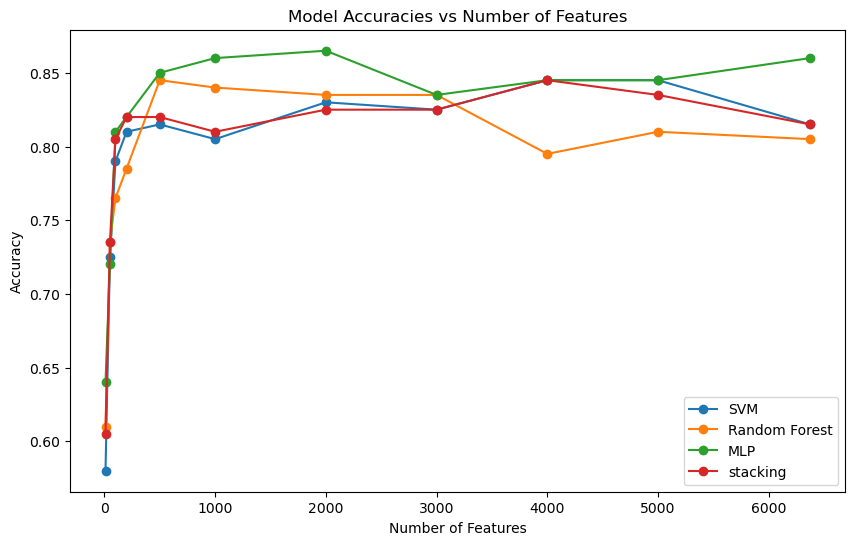

In [5]:
# Assuming accuracies is a dictionary with keys 'SVM', 'Random Forest', 'MLP' and their corresponding accuracies as lists
# Example: accuracies = {'SVM': [0.7, 0.75, ...], 'Random Forest': [0.72, 0.78, ...], 'MLP': [0.65, 0.7, ...]}

num_features_to_test = [10, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6373]  # The number of features tested

plt.figure(figsize=(10, 6))

# Plotting the accuracies for each model
plt.plot(num_features_to_test, accuracies['SVM'], label='SVM', marker='o')
plt.plot(num_features_to_test, accuracies['Random Forest'], label='Random Forest', marker='o')
plt.plot(num_features_to_test, accuracies['MLP'], label='MLP', marker='o')
plt.plot(num_features_to_test, accuracies['stacking'], label='stacking', marker='o')

# Adding titles and labels
plt.title('Model Accuracies vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()